# Exploring and Analyzing Text Data Assignment 

In [1]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [3]:
PATH = '/content/sample_data/cnn'
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [4]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

'Des Moines, Iowa (CNN) - Rep. Alexandria Ocasio-Cortez capped her debut on the Iowa hustings in support of Bernie Sanders last week with a blunt call to action. "This is not about something that we allow to happen to us. We don\'t let this race happen to us," she said at a rally for the Vermont senator in Council Bluffs. "We don\'t watch the presidential race. This is not a movie, this a movement." And yet, there has been a certain cinematic quality to the last six weeks of Sanders\' second Democratic presidential campaign. Nearly sidelined, or worse, by a heart attack in Las Vegas on the first night of October, Sanders has charted a remarkable revival. It\'s been powered by a run of invigorating endorsements, new poll results that showed him gaining steam in New Hampshire and Iowa, and the sense, fueled in part by the massive crowds that welcomed him during recent rallies in New York and Minnesota, that his "political revolution" was, after a trying summer, back on the march. There a

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [5]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [6]:
stats = []

for i, doc in enumerate(docs):
  doc_stats = text_stats(doc)
  doc_stats = [f'Article #{i}'] + doc_stats
  stats.append(doc_stats)

stats

[['Article #0',
  75,
  1654,
  830,
  538,
  45,
  11.066666666666666,
  5.913253012048193,
  0.6481927710843374],
 ['Article #1',
  20,
  469,
  262,
  179,
  25,
  13.1,
  6.248091603053435,
  0.683206106870229],
 ['Article #2',
  262,
  4573,
  2126,
  1124,
  91,
  8.114503816793894,
  5.942615239887112,
  0.528692380056444],
 ['Article #3',
  28,
  803,
  454,
  255,
  33,
  16.214285714285715,
  6.011013215859031,
  0.5616740088105727],
 ['Article #4',
  34,
  620,
  316,
  204,
  16,
  9.294117647058824,
  5.924050632911392,
  0.6455696202531646],
 ['Article #5',
  19,
  298,
  171,
  124,
  13,
  9.0,
  5.514619883040936,
  0.7251461988304093],
 ['Article #6',
  41,
  921,
  452,
  310,
  12,
  11.024390243902438,
  6.7234513274336285,
  0.6858407079646017],
 ['Article #7',
  423,
  7635,
  3949,
  1390,
  154,
  9.335697399527186,
  5.867814636616865,
  0.3519878450240567],
 ['Article #8',
  96,
  2218,
  1104,
  732,
  56,
  11.5,
  6.316123188405797,
  0.6630434782608695],


In [7]:
df = pd.DataFrame(stats)
df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

df.head()                  

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,Article #0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,Article #1,20,469,262,179,25,13.100000,6.248092,0.683206
2,Article #2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,Article #3,28,803,454,255,33,16.214286,6.011013,0.561674
4,Article #4,34,620,316,204,16,9.294118,5.924051,0.645570


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [8]:
df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,57.785714,1129.000000,593.357143,336.095238,38.238095,11.134133,6.027307,0.659878
std,79.242615,1373.375084,710.586801,283.833583,42.662493,2.185881,0.409359,0.094615
min,14.000000,214.000000,129.000000,96.000000,7.000000,8.114504,5.131579,0.351988
25%,19.250000,392.500000,200.000000,146.500000,15.000000,9.482143,5.854392,0.632258
50%,26.000000,579.500000,314.000000,209.000000,21.500000,10.228235,6.061849,0.668898
75%,65.250000,1480.750000,768.250000,463.500000,45.000000,12.941774,6.322274,0.722554
max,423.000000,7635.000000,3949.000000,1390.000000,238.000000,16.708333,6.820449,0.819549


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [9]:
def word_frequency(doc):
  cleaned = [token.lower() for token in word_tokenize(doc) 
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

  fdist = FreqDist(cleaned)

  fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
  fdist_df.columns = ['Term', 'Freq']

  ordered = fdist_df.sort_values('Freq', ascending=False)

  filtered = ordered[ordered['Freq'] > 1]

  return filtered

In [10]:
doc = word_frequency(docs[0])
doc.head(10)

,Term,Freq
10,sanders,27
40,campaign,11
58,new,7
2,iowa,6
3,cnn,6
22,said,6
71,recent,6
39,democratic,5
44,heart,5
150,primary,5


Text(0.5, 1.0, 'Term Frequency Distribution \n')

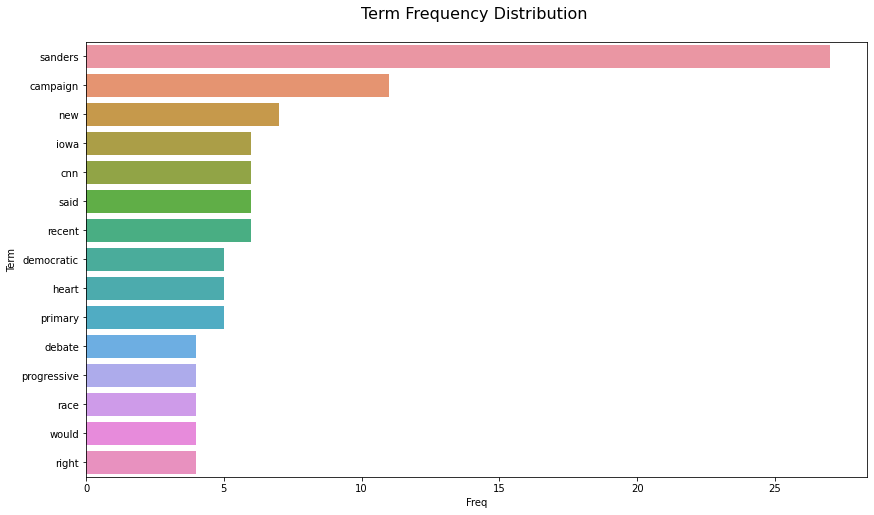

In [11]:
plt.figure(figsize=(14,8))
sns.barplot(data=doc.head(15), x='Freq', y='Term')
plt.title('Term Frequency Distribution \n', fontsize=16)

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [12]:
from PIL import Image
import numpy as np

In [13]:
mask = np.array(Image.open('/content/sample_data/cnn/iowa-lakes-rivers-map.gif'))

In [14]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800,
                    mask=mask, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

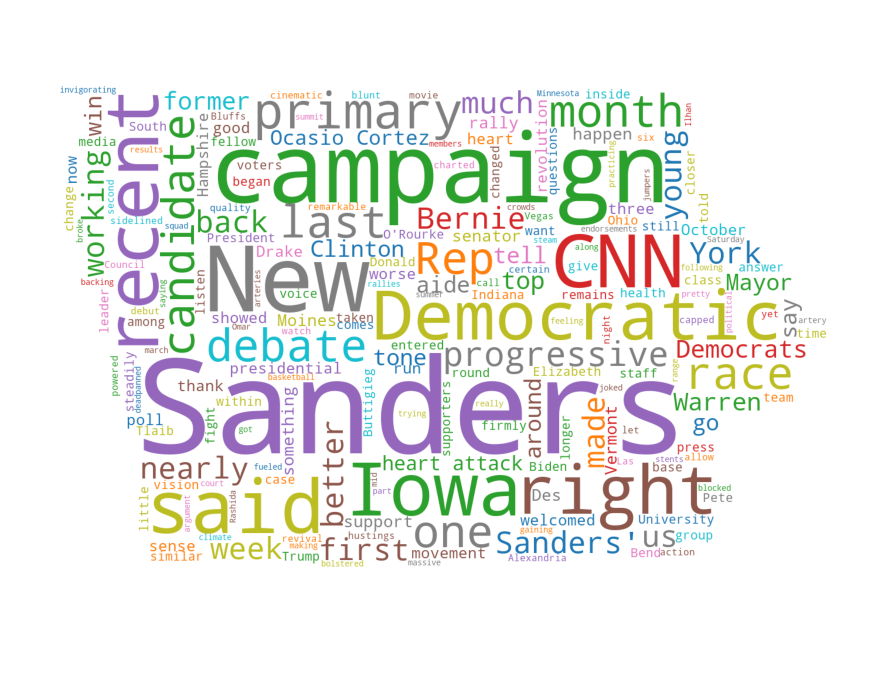

In [15]:
wordcloud(docs[0])

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [16]:
doc = word_frequency(docs[17])
doc.head(15)

,Term,Freq
3,trump,8
23,new,6
2,ivanka,5
13,party,4
12,book,4
5,kushner,4
1,cnn,3
24,triggered,3
29,list,3
44,white,3


In [17]:
people = []
nlp = spacy.load("en_core_web_sm")
spacy_doc = nlp(docs[17])

for entity in spacy_doc.ents: 
  if entity.label_ == 'PERSON':
      people.append(entity)

people

[Trump,
 Jared Kushner,
 Donald Trump,
 Trump,
 Don Jr.,
 Mick Mulvaney,
 Pam Bondi,
 Tony Sayegh,
 Trump,
 Jim Jordan,
 Bill Taylor,
 Trump,
 Trump Jr.,
 Kevin McCarthy,
 Matt Gaetz,
 Mark Meadows,
 Sebastian Gorka,
 Rand Paul,
 Sean Spicer,
 Jerry Falwell Jr.,
 Linda McMahon,
 Wilbur Ross,
 Kushner,
 book,"(it,
 Don,
 Kimberly Guilfoyle,
 Kushner,
 Kushner,
 Don,
 Trump]

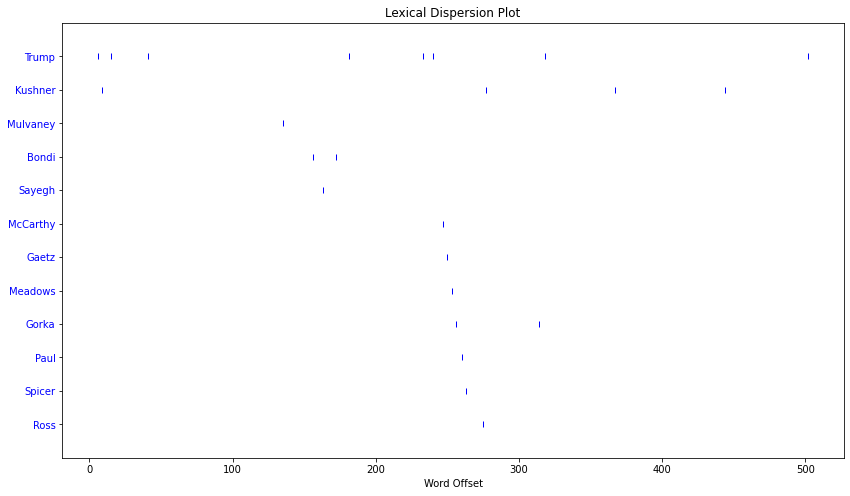

In [18]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

doc = docs[17]
tokenized = word_tokenize(doc)

terms = ['Trump', 'Kushner', 'Mulvaney', 'Bondi', 'Sayegh', 'McCarthy', 'Gaetz',
         'Meadows', 'Gorka', 'Paul', 'Spicer', 'Ross']

Text(tokenized).dispersion_plot(terms)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [19]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
doc = docs[17]

tokens = word_tokenize(doc) 
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer() 
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))
print('\n')

Washington ( CNN ) - Ivanka Trump and Jared Kushner , two of President Donald Trump 's senior advisers , threw a book party on the evening of the first public impeachment hearings . It was an invite-only celebration for Ivanka Trump 's older brother , Don Jr. , in honor of his new book , `` Triggered '' which debuted as No . 1 on The New York Times bestselling list . The party , which appeared to be for 50 or so guests , was held at the Top of the Hay , a posh , penthouse-level event space that typically rents for thousands of dollars , at the Hay-Adams Hotel , overlooking the White House . The guests , according to Instagram photos , included White House acting chief of staff Mick Mulvaney , as well as two new members of the White House anti-impeachment messaging team , former Florida Attorney General Pam Bondi and former Treasury Department spokesman Tony Sayegh . In one photograph from the party , Bondi and State Department spokeswoman Morgan Ortagus flank Ivanka Trump , all three c